# **Flight Booking Price Prediction**

### **Problem Statement**
* The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

### import the important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
df = pd.read_csv("Datasets/Flight_Booking.csv", index_col="Unnamed: 0")
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Visualise the Dataset

In [3]:
df.shape

(300153, 11)

In [4]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


### Handle Missing Value

In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Data Visualization

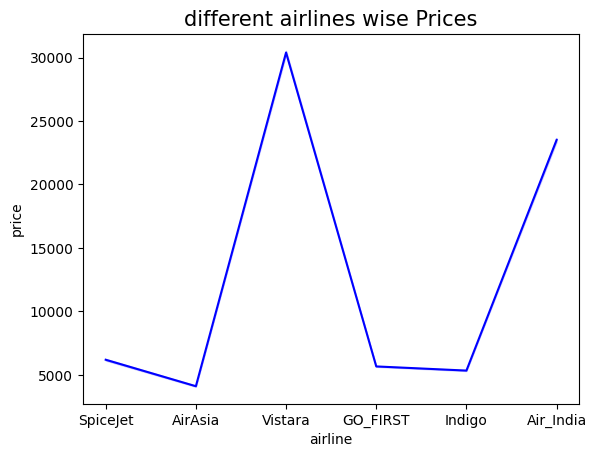

In [8]:
# There is a variation in price with different airlines

sns.lineplot(x="airline", y="price", data=df, color="blue")
plt.title("different airlines wise Prices", fontsize=15)
plt.show()

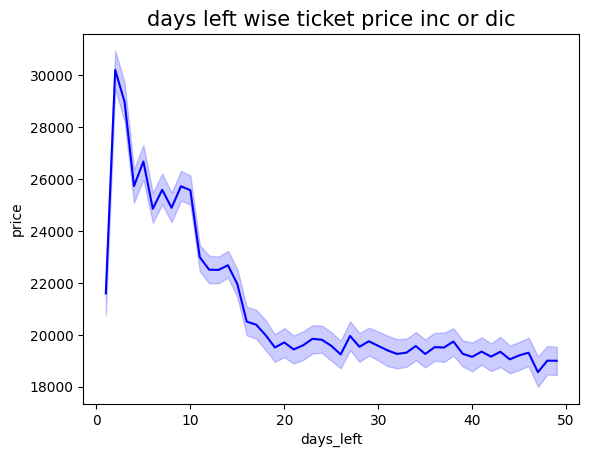

In [9]:
# The price of the ticket increases as the days left for departure decreases

sns.lineplot(x='days_left', y='price', data=df, color='blue')
plt.title('days left wise ticket price inc or dic', fontsize=15)
plt.show()

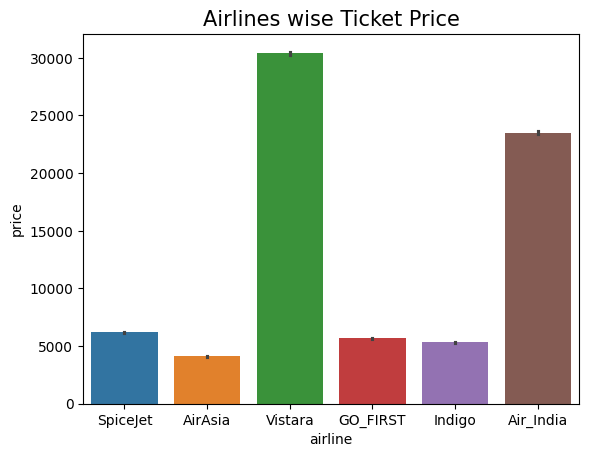

In [10]:
# Price range of all the airlines

sns.barplot(x='airline', y='price', data=df, hue='airline')
plt.title('Airlines wise Ticket Price', fontsize=15)
plt.show()

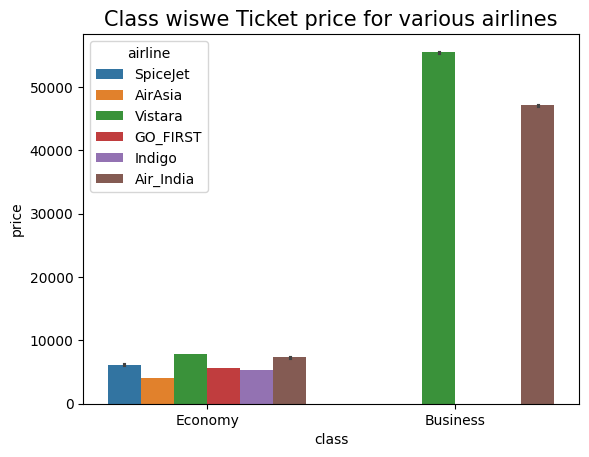

In [11]:
# Range of price of all the flights of Economy and Business class

sns.barplot(x='class', y='price', data=df, hue='airline')
plt.title('Class wiswe Ticket price for various airlines', fontsize=15)
plt.show()

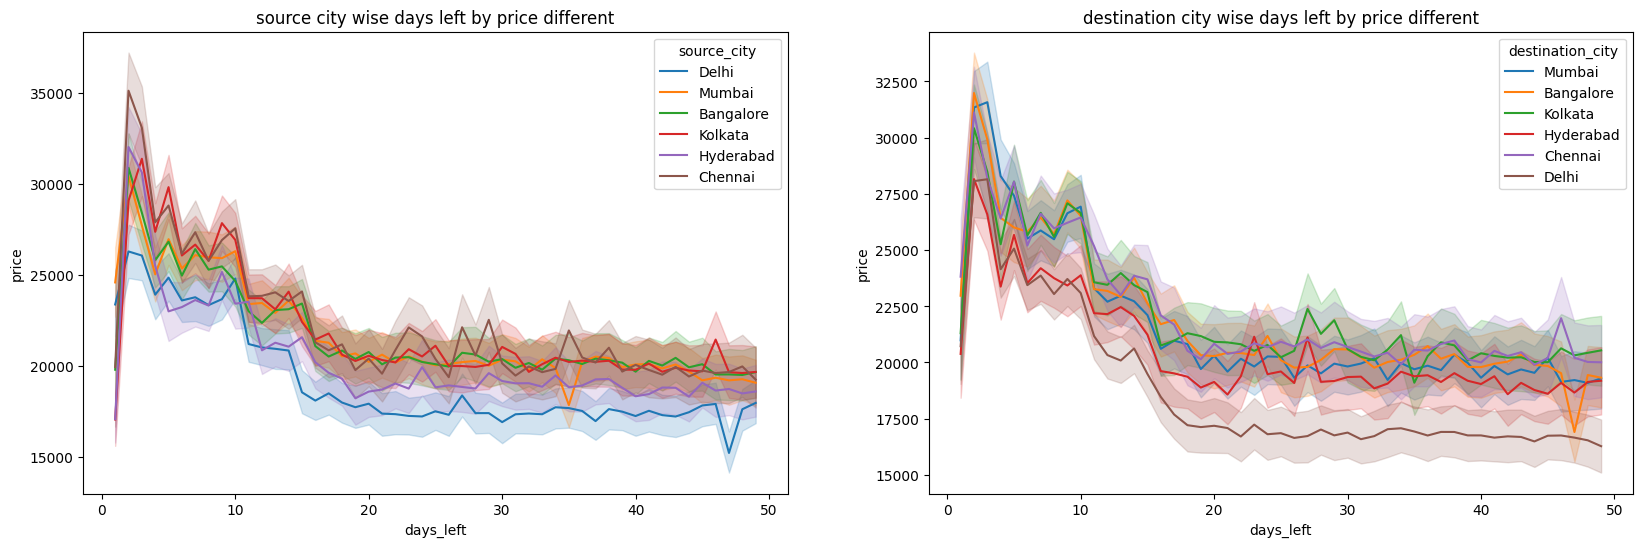

In [12]:
# Range of price of flights with source and destination city according to the  days left

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.lineplot(data=df, x='days_left', y='price', hue='source_city')
plt.title('source city wise days left by price different')

plt.subplot(1,2,2)
sns.lineplot(data=df, x='days_left', y='price', hue='destination_city')
plt.title('destination city wise days left by price different')

plt.show()

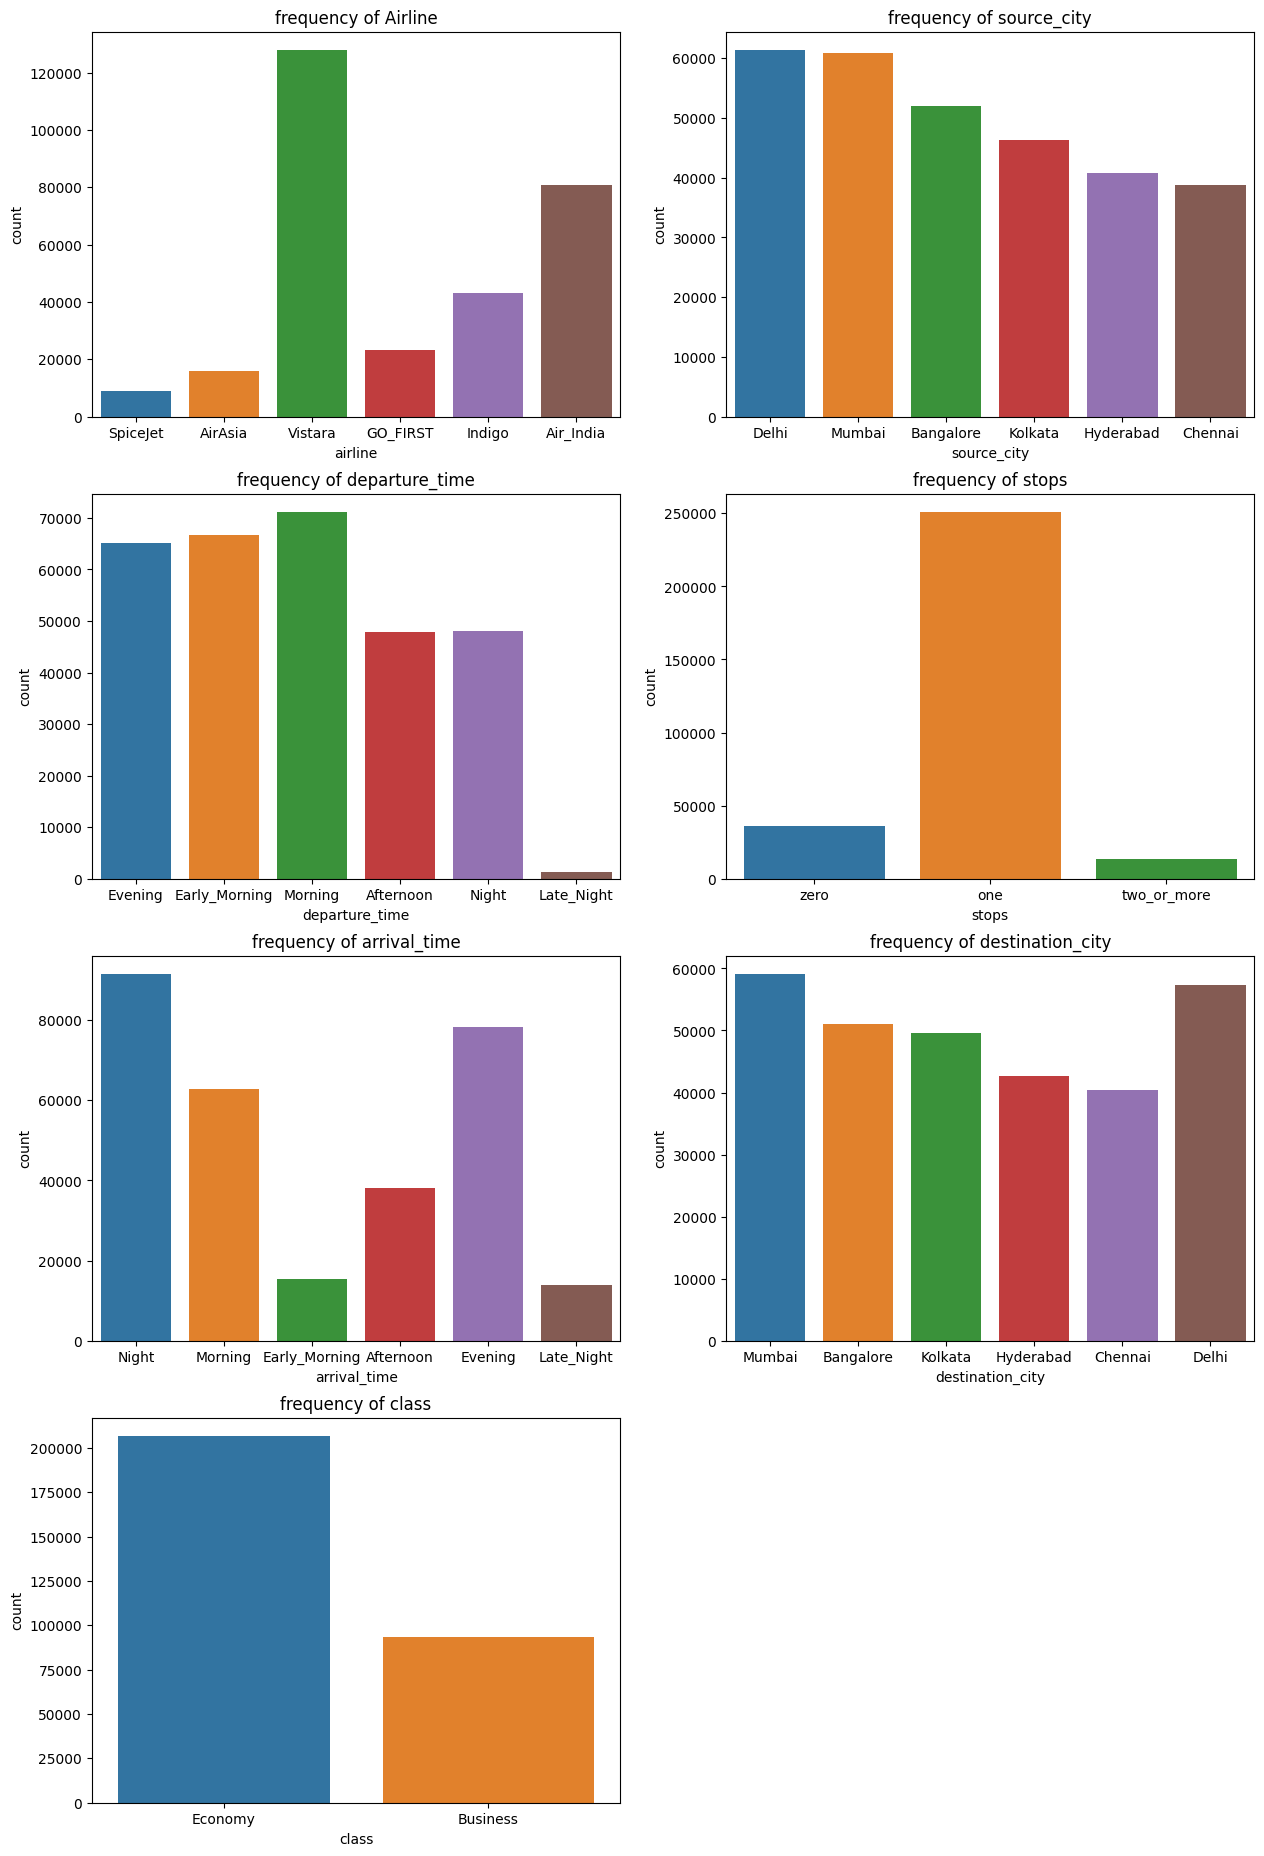

In [13]:
# Visualization of categorical features with countplot

plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(data=df, x='airline', hue='airline')
plt.title('frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(data=df, x='source_city', hue='source_city')
plt.title('frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(data=df, x='departure_time', hue='departure_time')
plt.title('frequency of departure_time')

plt.subplot(4,2,4)
sns.countplot(data=df, x='stops', hue='stops')
plt.title('frequency of stops')

plt.subplot(4,2,5)
sns.countplot(data=df, x='arrival_time', hue='arrival_time')
plt.title('frequency of arrival_time')

plt.subplot(4,2,6)
sns.countplot(data=df, x='destination_city', hue='destination_city')
plt.title('frequency of destination_city')

plt.subplot(4,2,7)
sns.countplot(data=df, x='class', hue='class')
plt.title('frequency of class')

plt.show()

### Data Preprocessing

In [14]:
# Performing One Hot Encoding for categorical features of a dataframe

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['flight'] = le.fit_transform(df['flight'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 18.3 MB


### Feature Selection

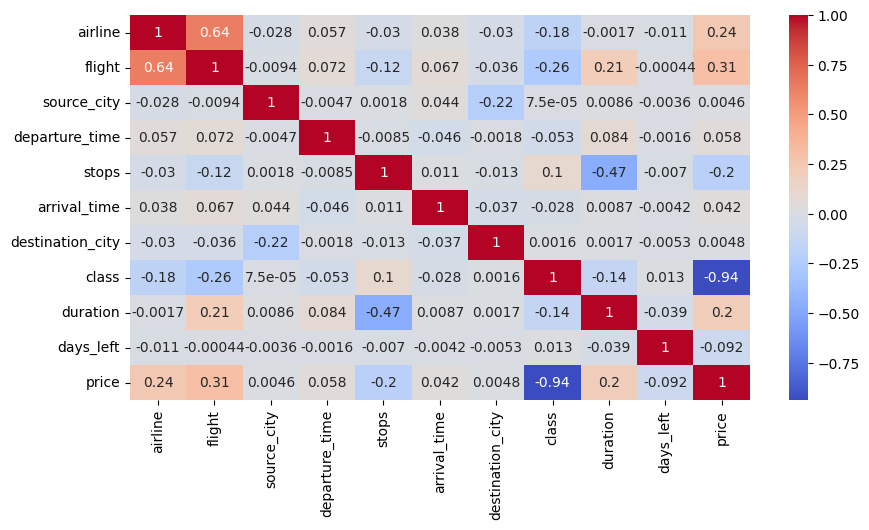

In [16]:
# Plotting the correlation graph to see the correlation between features and dependent variable.

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

col_list = []

for col in df.columns:
    if df[col].dtypes != 'object' and col != 'price':
        col_list.append(col)

col_df = df[col_list]

vif_data = pd.DataFrame()
vif_data['features'] = col_df.columns
vif_data['VIF'] = [vif(col_df.values, i) for i in range(len(col_df.columns))]
vif_data

,features,VIF
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [18]:
df = df.drop(columns=['flight'], axis=1)

In [19]:
col_list = []

for col in df.columns:
    if df[col].dtypes != 'object' and col != 'price':
        col_list.append(col)

col_df = df[col_list]

vif_data = pd.DataFrame()
vif_data['features'] = col_df.columns
vif_data['VIF'] = [vif(col_df.values, i) for i in range(len(col_df.columns))]
vif_data

,features,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


# **ML Model**

### Split the data

In [ ]:
x = df.drop(columns=['price'])
y = df['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### data Standardization

In [ ]:
# Applying standardization 

from sklearn.preprocessing import StandardScaler
ss =  StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### Linear Regressor

In [31]:
# implementing Linear Regression Model to predict the price of a flight.

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [40]:
# check Error and accuracy

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("R2-Score(%): ", r2_score(y_test, y_pred)*100)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE(%): ", mean_absolute_percentage_error(y_test, y_pred)*100)

R2-Score(%):  97.5649246127679
MSE:  12552381.96922007
RMSE:  3542.934090442563
MAE:  1173.7018956872282
MAPE(%):  7.406134916059504


C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_9896\1229759428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_9896\1229759428.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predict

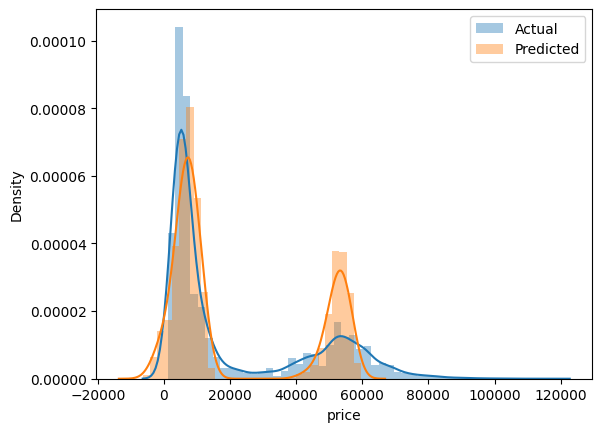

In [36]:
# Plotting the graph of actual and predicted price of flight 

sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()
plt.show()

### Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)
y_pred = dtr_model.predict(x_test)

In [39]:
# check Error and accuracy

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("R2-Score(%): ", r2_score(y_test, y_pred)*100)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE(%): ", mean_absolute_percentage_error(y_test, y_pred)*100)

R2-Score(%):  97.5649246127679
MSE:  12552381.96922007
RMSE:  3542.934090442563
MAE:  1173.7018956872282
MAPE(%):  7.406134916059504


C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_9896\1229759428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_9896\1229759428.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predict

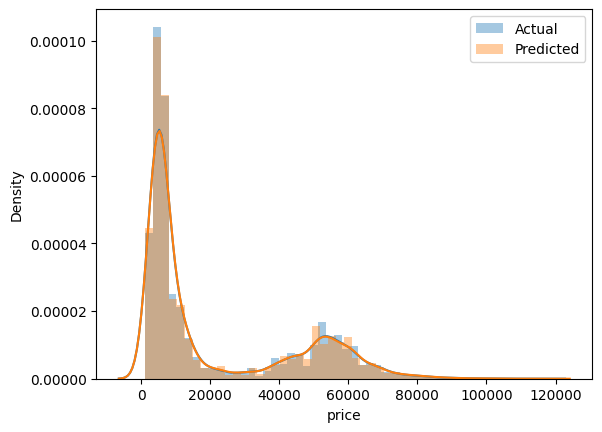

In [41]:
# Plotting the graph of actual and predicted price of flight 

sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()
plt.show()

### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)
y_pred = rfr_model.predict(x_test)

In [45]:
# check Error and accuracy

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("R2-Score(%): ", r2_score(y_test, y_pred)*100)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE(%): ", mean_absolute_percentage_error(y_test, y_pred)*100)

R2-Score(%):  98.49861558041736
MSE:  7739370.541073376
RMSE:  2781.9724191791292
MAE:  1090.4866716475647
MAPE(%):  7.052321544419988


C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_9896\1229759428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_9896\1229759428.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predict

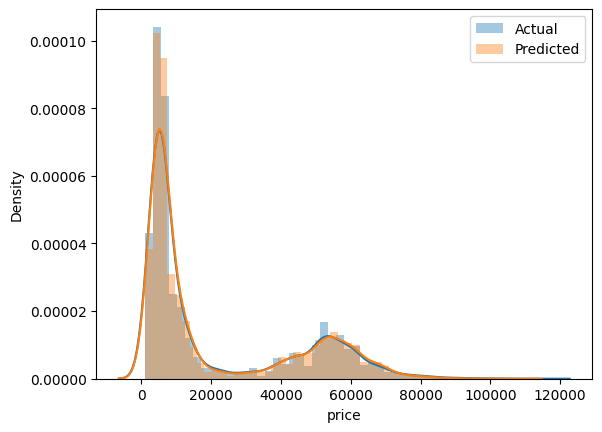

In [46]:
# Plotting the graph of actual and predicted price of flight 

sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()
plt.show()